# fourth notebook - Data yacht_hydrodynamics

### imports

In [34]:
import dect_function
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import tables
import pandas as pd


### Part 1
### Boot Algorithms Detection of anomalies and 
### Running the algorithms


In [35]:



algos = [LocalOutlierFactor(n_neighbors=20, algorithm="auto", leaf_size=30, metric="minkowski", p=2, metric_params=None, contamination=0.1, novelty=False, n_jobs=None),
    EllipticEnvelope( store_precision=True, assume_centered=False, support_fraction=None, contamination=0.1, random_state=2),
    OneClassSVM(kernel="rbf", degree=2, gamma="scale", coef0=0, tol=0.1, nu=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1),
    IsolationForest(n_estimators=200, max_samples="auto", contamination=0.015, max_features=1, bootstrap=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)]
path = "../data_sets/yacht_hydrodynamics.csv"
df = pd.read_csv(path)


acc = dect_function.improvement_test_regression(df,algos)
for ac in acc:
    print(ac)
    


{'mean_squared_error': 72.38867775303474, 'mean_absolute_error': 7.165765328040008}
{'mean_squared_error': 70.69273514368057, 'mean_absolute_error': 7.054238253016824}
{'mean_squared_error': 72.59813255554091, 'mean_absolute_error': 7.146162147707156}
{'mean_squared_error': 70.00559156596626, 'mean_absolute_error': 6.769539653084187}
{'mean_squared_error': 72.18196294540226, 'mean_absolute_error': 7.054309339134943}


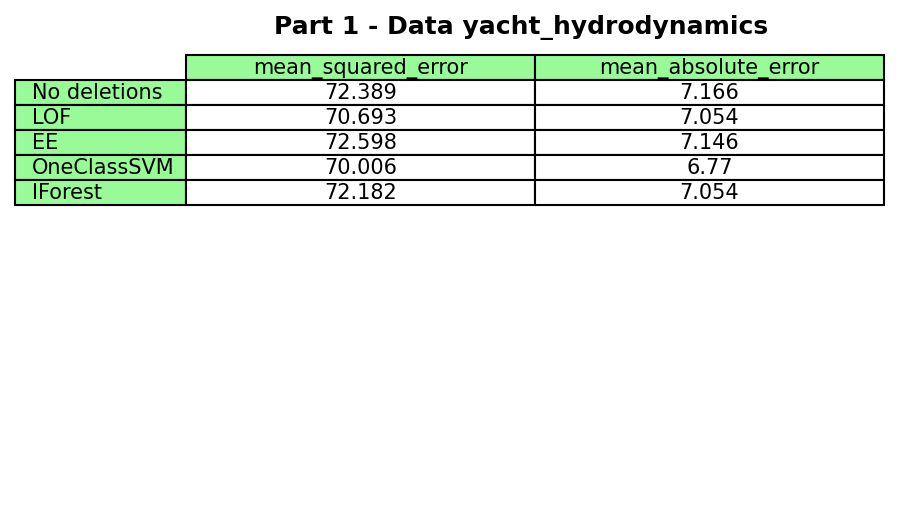

In [36]:
tables.algo_alone(acc ,"Part 1 - Data yacht_hydrodynamics")


### Part 2
### 4 experiments of combinations

In [37]:
acc2 = dect_function.delete_all(df,[algos[0],algos[3]])
# acc2 = dect_function.delete_all(df,[algos[0],algos[1],algos[3],algos[2]])
print(acc2)
#[algos[0],algos[1],algos[3],algos[2]]




{'mean_squared_error': 71.25850573330852, 'mean_absolute_error': 6.946266284036535}


In [38]:
acc3 = dect_function.Add_and_delete(df,[algos[0],algos[3]])
print(acc3)


{'mean_squared_error': 72.08758993864824, 'mean_absolute_error': 7.112031911199026}


In [39]:

acc4 = dect_function.uniformy_average(df,[algos[2],algos[3]])
print(acc4)


{'mean_squared_error': 70.22702223687646, 'mean_absolute_error': 6.750823962838622}


In [40]:


algos2 = [algos[2],algos[3]]
ratio = [0.7,0.3]

acc5 = dect_function.ratio_average(df,algos2,ratio,10)
print(acc5)

{'mean_squared_error': 70.21491685411634, 'mean_absolute_error': 6.735379890666115}


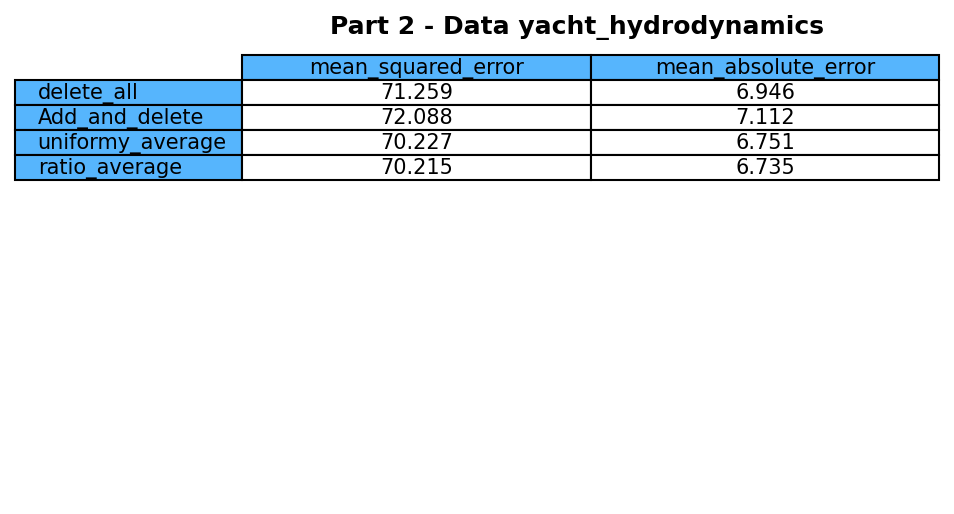

In [41]:
val2 = ["delete_all","Add_and_delete","uniformy_average","ratio_average"]
list_acc = [acc2,acc3,acc4,acc5]

tables.part2(list_acc,"Part 2 - Data yacht_hydrodynamics",val2)

### Part 3


In [42]:

best_result = acc[0].copy()
dd = dect_function.combination(df,algos,best_result)
acc.append(best_result)
for a in acc:
    print(a)
print(best_result)
print(dd)



{'mean_squared_error': 72.38867775303474, 'mean_absolute_error': 7.165765328040008}
{'mean_squared_error': 70.69273514368057, 'mean_absolute_error': 7.054238253016824}
{'mean_squared_error': 72.59813255554091, 'mean_absolute_error': 7.146162147707156}
{'mean_squared_error': 70.00559156596626, 'mean_absolute_error': 6.769539653084187}
{'mean_squared_error': 72.18196294540226, 'mean_absolute_error': 7.054309339134943}
{'mean_squared_error': 69.98336884033537, 'mean_absolute_error': 6.705832876402191}
{'mean_squared_error': 69.98336884033537, 'mean_absolute_error': 6.705832876402191}
{'mean_squared_error': array([-1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,
        1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,
        1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,

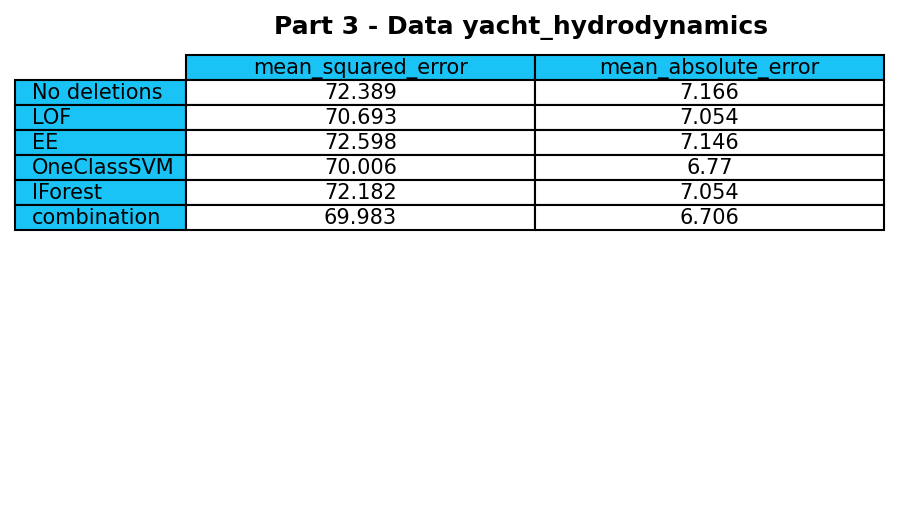

In [43]:
tables.algo_combination(acc,"Part 3 - Data yacht_hydrodynamics")